# Projektarbeit
## Certified Data Scientist

## mit dem Thema 
# Anomalie Erkennung bei Mobiltelephon Daten
### von Gerd Burgdorf

## Imports

In [194]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [144]:
import warnings
warnings.simplefilter('ignore')

## Load Data

In [120]:
features = 'meanA,meanAstd,meangstd,stdmeanA,stdstda,meang,skewmeanA,skewstdA,skewG,minmeanA,minstdA,minG,maxmeanA,' 
features = features + 'maxstdA,maxmG,kurtmeanA,kurtstdA,kurtG,entromeanA,entrostdA,entroG,iqrmeanA,iqrstdA,iqrG'
cols = features + ',class'
x_feat = features.split(',') # Später für die Feature Importance
# df = pd.read_csv('C:\\Users/Gerd/Documents/Data/MobilePhoneAnomalyImport.csv', delimiter=',')
df = pd.read_csv('MobilePhoneAnomalyImport.csv', delimiter=',')
df.columns= cols.split(',')

## Data Inspection

In [7]:
df.head()

,meanA,meanAstd,meangstd,stdmeanA,stdstda,meang,skewmeanA,skewstdA,skewG,minmeanA,...,kurtmeanA,kurtstdA,kurtG,entromeanA,entrostdA,entroG,iqrmeanA,iqrstdA,iqrG,class
0,1.003853,0.005816,0.168383,0.003261,0.002917,0.207648,-0.410724,0.751071,0.904551,0.990956,...,0.459438,-0.048304,0.222102,4.605161,4.467455,4.420494,0.005208,0.004814,0.117449,1
1,1.003775,0.023734,0.368631,0.025993,0.025151,0.368631,1.852045,2.815163,0.596992,0.967968,...,4.331743,8.655530,-0.432390,4.604840,4.203549,4.460488,0.029840,0.018948,0.274239,1
2,1.004330,0.016759,0.279067,0.014712,0.009971,0.255733,0.474464,0.757765,0.330055,0.984220,...,0.851071,0.266029,-0.800815,4.605063,4.519563,4.525149,0.021538,0.031835,0.123389,1
3,1.004302,0.009317,0.271160,0.002629,0.003489,0.233640,0.456424,0.464779,0.607188,0.999489,...,-0.543562,0.111179,-0.785866,4.605168,4.543790,4.370444,0.003429,0.003928,0.331182,1
4,1.007222,0.025733,0.272286,0.017311,0.020853,0.282889,0.218740,0.395442,0.025378,0.952886,...,-0.029967,-0.172080,-0.440626,4.605116,4.428032,4.546752,0.022145,0.011951,0.105488,1


In [85]:
# df.to_excel(r'C:\\Users/Gerd/\Documents/Data/MobilePhoneAnomalyExport.xlsx')

In [8]:
df.shape

(3071, 25)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meanA       3071 non-null   float64
 1   meanAstd    3071 non-null   float64
 2   meangstd    3071 non-null   float64
 3   stdmeanA    3071 non-null   float64
 4   stdstda     3071 non-null   float64
 5   meang       3071 non-null   float64
 6   skewmeanA   3071 non-null   float64
 7   skewstdA    3071 non-null   float64
 8   skewG       3071 non-null   float64
 9   minmeanA    3071 non-null   float64
 10  minstdA     3071 non-null   float64
 11  minG        3071 non-null   float64
 12  maxmeanA    3071 non-null   float64
 13  maxstdA     3071 non-null   float64
 14  maxmG       3071 non-null   float64
 15  kurtmeanA   3071 non-null   float64
 16  kurtstdA    3071 non-null   float64
 17  kurtG       3071 non-null   float64
 18  entromeanA  3071 non-null   float64
 19  entrostdA   3071 non-null  

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
meanA,3071.0,1.005052,0.004499,0.976465,1.003194,1.004881,1.006692,1.045438
meanAstd,3071.0,0.025769,0.017882,0.002638,0.014103,0.020130,0.032947,0.170572
meangstd,3071.0,0.284755,0.168021,0.019206,0.154852,0.262092,0.384051,1.466726
stdmeanA,3071.0,0.020491,0.017850,0.000829,0.007062,0.016460,0.027906,0.161528
stdstda,3071.0,0.022096,0.020027,0.001114,0.008780,0.016159,0.029957,0.225046
meang,3071.0,0.286969,0.170975,0.019206,0.155105,0.262763,0.384213,1.466726
skewmeanA,3071.0,0.419909,0.831566,-3.238301,-0.084340,0.361176,0.816874,8.606912
skewstdA,3071.0,1.303161,0.814974,-1.226449,0.755640,1.175430,1.747173,8.923144
skewG,3071.0,0.526791,0.591650,-1.481981,0.140792,0.501755,0.871507,5.411535
minmeanA,3071.0,0.960518,0.035369,0.632871,0.943015,0.968435,0.987304,1.005330


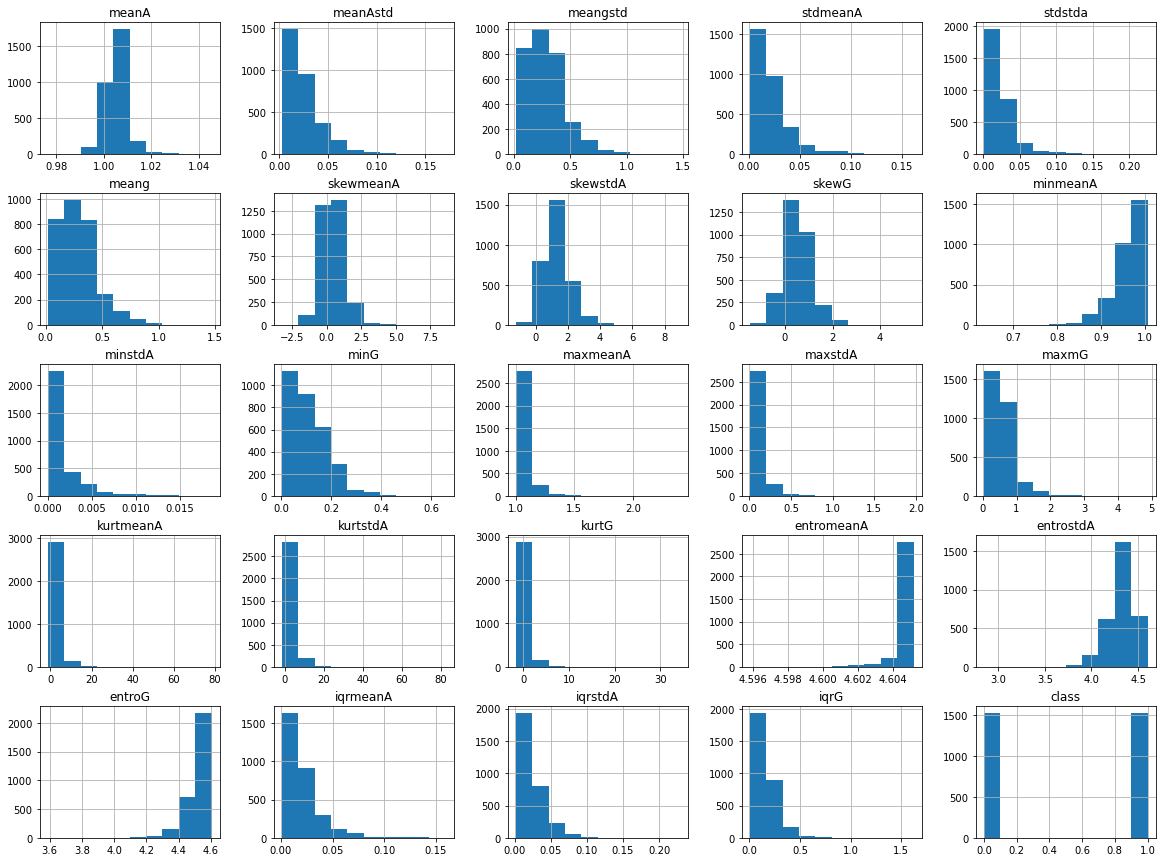

In [11]:
# Darstellung der einzlenen Datenverteilungen mittels Histogramm
df.hist(figsize=(20,15))
plt.show()

In [12]:
# Auswertung der Daten bzgl. ihrer paarweise linearen Korrelation mit dem Pearson Korrelationskoeffizienten
df.corr()

,meanA,meanAstd,meangstd,stdmeanA,stdstda,meang,skewmeanA,skewstdA,skewG,minmeanA,...,kurtmeanA,kurtstdA,kurtG,entromeanA,entrostdA,entroG,iqrmeanA,iqrstdA,iqrG,class
meanA,1.000000,0.281107,0.183150,0.413455,0.326683,0.184169,0.328388,0.145955,0.071497,-0.170565,...,0.170193,0.175275,0.029014,-0.425326,-0.164430,-0.145345,0.322607,0.250917,0.230046,-0.010144
meanAstd,0.281107,1.000000,0.495351,0.800588,0.853340,0.497709,0.246642,0.299291,-0.016606,-0.738921,...,0.170409,0.210450,0.026125,-0.667254,-0.356845,0.119173,0.755548,0.894472,0.282221,0.176572
meangstd,0.183150,0.495351,1.000000,0.517825,0.424789,0.973510,0.071075,0.167874,-0.078174,-0.523233,...,0.067386,0.071267,-0.042012,-0.383780,-0.222467,0.007584,0.518749,0.465075,0.776045,0.236792
stdmeanA,0.413455,0.800588,0.517825,1.000000,0.839431,0.526258,0.365472,0.401859,0.002685,-0.849385,...,0.343054,0.336821,0.027050,-0.891498,-0.515790,-0.023631,0.806078,0.767373,0.424207,0.115173
stdstda,0.326683,0.853340,0.424789,0.839431,1.000000,0.430235,0.378280,0.540186,-0.008064,-0.750394,...,0.450308,0.472796,0.031107,-0.734762,-0.636679,0.036638,0.617342,0.788197,0.277667,0.130098
meang,0.184169,0.497709,0.973510,0.526258,0.430235,1.000000,0.069134,0.166438,-0.078456,-0.532126,...,0.078388,0.070031,-0.035840,-0.395392,-0.224663,0.015166,0.507339,0.465265,0.771271,0.245658
skewmeanA,0.328388,0.246642,0.071075,0.365472,0.378280,0.069134,1.000000,0.418487,0.060484,-0.074059,...,0.533075,0.464295,0.042374,-0.309823,-0.406573,-0.101747,0.181750,0.192775,0.080919,-0.017934
skewstdA,0.145955,0.299291,0.167874,0.401859,0.540186,0.166438,0.418487,1.000000,-0.025354,-0.396434,...,0.706388,0.885910,0.006622,-0.316300,-0.736449,-0.075269,0.157384,0.214957,0.148972,0.088885
skewG,0.071497,-0.016606,-0.078174,0.002685,-0.008064,-0.078456,0.060484,-0.025354,1.000000,0.029833,...,0.009264,-0.011705,0.705255,-0.012982,-0.007264,-0.435142,-0.026076,0.002274,-0.034047,-0.056731
minmeanA,-0.170565,-0.738921,-0.523233,-0.849385,-0.750394,-0.532126,-0.074059,-0.396434,0.029833,1.000000,...,-0.299213,-0.279145,-0.026340,0.726509,0.521708,-0.014611,-0.675369,-0.713651,-0.398560,-0.159766


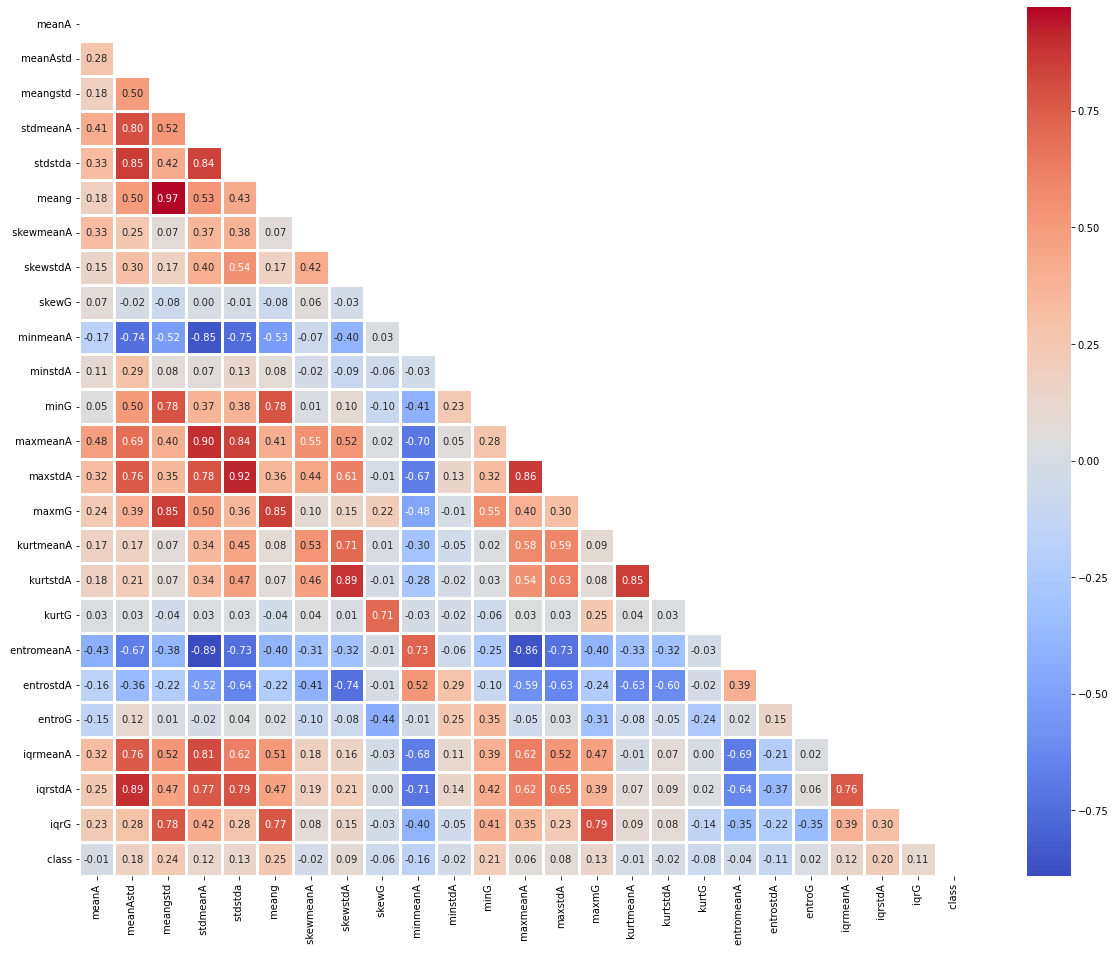

In [31]:
# Darstellung in einer halbseitigen Heatmap
plt.figure(figsize=(20, 16))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), mask = matrix, annot = True, fmt = '.2f', linewidth = 3, cmap = 'coolwarm')
plt.xticks(rotation=90)
plt.show()

In [ ]:
pd.plotting.scatter_matrix(df, alpha = 0.5, figsize = (15,15))
plt.xticks(rotation= 90)
plt.yticks(rotation= 0)
plt.subplots_adjust(bottom=0.20)
plt.show()

## Data Preparation

### Train-Test-Split

In [102]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:24]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [103]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

### Feature Importance and Selection

In [113]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train_std, y_train)
importance = clf.feature_importances_ # Importance auslesen
importance

array([0.10988935, 0.03279631, 0.01387687, 0.00875818, 0.17762717,
       0.06364706, 0.02944417, 0.02256533, 0.02755911, 0.02084882,
       0.05196572, 0.02503481, 0.0195177 , 0.00798123, 0.05901516,
       0.03131947, 0.04275433, 0.05553907, 0.02525991, 0.05381089,
       0.06049793, 0.00973266, 0.01453211, 0.03602666])

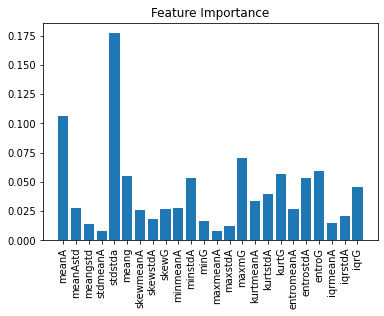

In [108]:
# plt.bar([x for x in range(len(importance))], importance) # Plot-Feature-Bedeutung
plt.bar(x_feat, importance) # Plot-Feature-Bedeutung
# plt.bar(features, importance)
plt.title("Feature Importance")
# plt.xticks(len(importance),[features])
plt.xticks(rotation= 90)
# plt.xlabel(x_feat)

plt.show()

## Single Classifiers

In [14]:
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

mdlLR = LogisticRegression()
mdlkNNClf = KNeighborsClassifier(n_neighbors=5)
mdlDCTClf = DecisionTreeClassifier(max_depth=6)
mdlRNDFClf = RandomForestClassifier(n_estimators=50)

### Decision Tree Classifier

In [116]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train_std, y_train)
print(clf.score(X_test_std, y_test))

0.7733188720173536


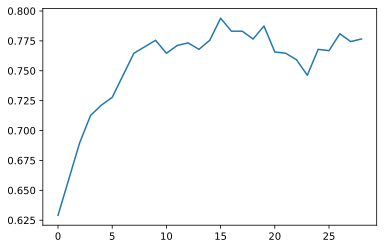

In [118]:
scores = []
for i in range(1,30):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train_std, y_train)
    score = clf.score(X_test_std, y_test)
    scores.append(score)
plt.plot(scores)
plt.show()

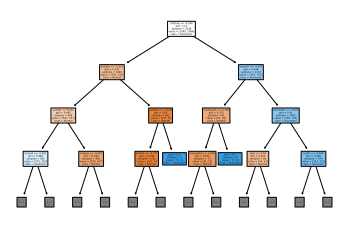

In [119]:
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.tree import plot_tree
plot_tree(clf, max_depth=3, 
          feature_names=df.columns,
          class_names=['Normal', 'Anomalie!'], # Beschriftungen Klasse, bzw. Zweig
         filled=True) # Farbe
plt.savefig('Phone_Anomaly.pdf') # Ausgabe als extra Datei als pdf
plt.show()

### kNN Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_std, y_train)
print(clf.score(X_test_std, y_test))

0.8503253796095445


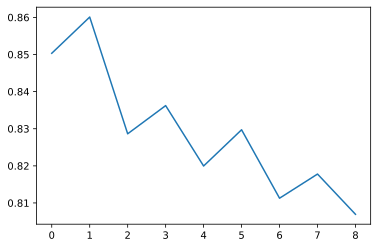

In [121]:
scores = []
for i in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_std, y_train)
    score = clf.score(X_test_std, y_test)
    scores.append(score)
plt.plot(scores)
plt.show()

### Support Vector Classifier

In [53]:
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(X_train_std, y_train)
clf.score(X_test_std, y_test)

0.7982646420824295

## Ensemble Methoden 

### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [76]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_std, y_train)
print(clf.score(X_test_std, y_test))

0.8698481561822126


In [ ]:
scores = []
for i in range(1,10):
    clf = RandomForestClassifier(n_estimators=200)
    clf.fit(X_train_std, y_train)
    score = clf.score(X_test_std, y_test)
    scores.append(score)
plt.plot(scores)
plt.show()

### AdaBoost

In [156]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), algorithm="SAMME", n_estimators=100)
clf.fit(X_train_std, y_train)
print(clf.score(X_test_std, y_test))

0.8817787418655098


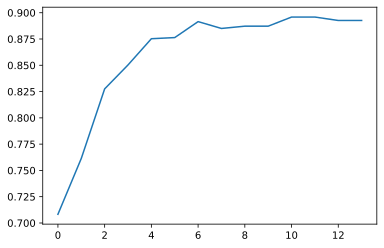

In [157]:
scores = []
for i in range(1,15):
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i), algorithm="SAMME", n_estimators=100)
    clf.fit(X_train_std, y_train)
    score = clf.score(X_test_std, y_test)
    scores.append(score)
plt.plot(scores)
plt.show()

In [200]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), algorithm="SAMME", n_estimators=100)
clf.fit(X_train_std, y_train)
score = clf.score(X_test_std, y_test)
print(score)

0.886117136659436


## Best Model

In [129]:
from sklearn.linear_model import LogisticRegression
models = {'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), algorithm="SAMME", n_estimators=200),
          'DecisionTree': DecisionTreeClassifier(max_depth=15),
          'k-NextNeighbor': KNeighborsClassifier(),
          'Logistic Regression': LogisticRegression(),
          'RandomForest': RandomForestClassifier(n_estimators=100),
          'Support Vector': SVC()}

In [130]:
for name, model in models.items():
    model.fit(X_train_std, y_train)
    print('Model {} scored with an accuracy of: {:.2f}%'.format(name, model.score(X_test_std, y_test)*100))

Model AdaBoost scored with an accuracy of: 89.48%
Model DecisionTree scored with an accuracy of: 77.77%
Model k-NextNeighbor scored with an accuracy of: 82.00%
Model Logistic Regression scored with an accuracy of: 63.45%
Model RandomForest scored with an accuracy of: 86.77%
Model Support Vector scored with an accuracy of: 79.83%


### Voting Classifier

In [131]:
vc = VotingClassifier([(name, model) for name, model in models.items()])
vc.fit(X_train_std, y_train)
vc.score(X_test_std, y_test)

0.8665943600867679

## Metriken

### Confusion Matrix

In [171]:
y_pred = clf.predict(X_test_std) # Aus Zeile 156: clf ist noch mit AdaBoost initialisiert
confusion_matrix(y_test, y_pred)

array([[419,  52],
       [ 47, 404]], dtype=int64)

In [205]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True Positive: ' + str(tp))
print('False Positive:' + str(fp))
print('False Negative:' + str(fn))
print('True Negative: ' + str(tn))

True Positive: 404
False Positive:52
False Negative:47
True Negative: 419


### ACHTUNG: sklearn vertauscht die Diagonale bei der Confusion Matrix!!!!!

In [184]:
cm = np.array([[tp,fp],[fn,tn]])
cm

array([[404,  52],
       [ 47, 419]], dtype=int64)

<Figure size 288x288 with 0 Axes>

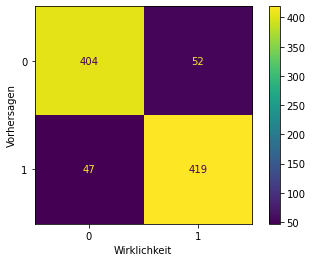

In [196]:
# cm = confusion_matrix(y_test, y_pred, labels=[0,1]) #clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) #, display_labels=[1,0]) #clf.classes_)
plt.figure(figsize=(4,4))
disp.plot()
plt.xlabel('Wirklichkeit')
plt.ylabel('Vorhersagen')
plt.show()

## Weitere Metriken: 

In [207]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
fpr = fp / (fp + tn)
f1_score_1 = 2*recall*precision / (recall + precision)
f1_score_2 = tp / (tp + (fp + fn)/2)

print('Akkuranz beträgt:   {:.2f}%'.format(accuracy*100))
print('Precision beträgt:  {:.2f}%'.format(precision*100))
print('Recall beträgt:     {:.2f}%'.format(recall*100))
print('FPR beträgt:        {:.2f}%'.format(fpr*100))
print('F1-Score beträgt:   {:.2f}%'.format(f1_score_1*100))

Akkuranz beträgt:   89.26%
Precision beträgt:  88.60%
Recall beträgt:     89.58%
FPR beträgt:        11.04%
F1-Score beträgt:   89.08%


## ROC Graph

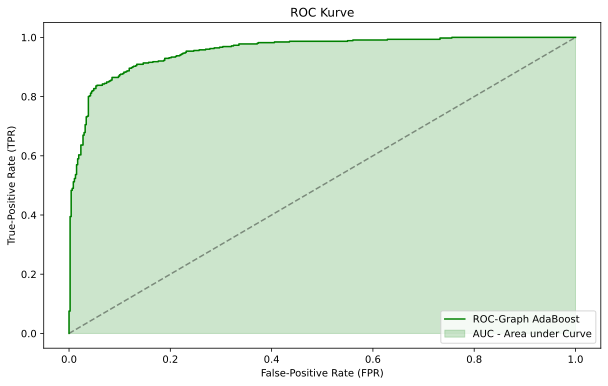

In [151]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), algorithm="SAMME", n_estimators=100)
clf.fit(X_train_std, y_train)

plt.figure(figsize=(10,6))
plt.title('ROC Kurve')
fpr, tpr, threshold = metrics.roc_curve(y_test.values, clf.predict_proba(X_test_std)[:,1:])
plt.plot([0,1],[0,1],ls='--', c ='black', alpha=0.4)
plt.plot(fpr,tpr,label = 'ROC-Graph AdaBoost', c='green')
plt.fill_between(fpr, tpr, color='green', alpha=0.2,label='AUROC - Area under ROC')
plt.xlabel('False-Positive Rate (FPR)')
plt.ylabel('True-Positive Rate (TPR)')
plt.legend()
plt.show()